In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("customer_segmentation.csv")

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Here it is visible that only 24 values are not there in the data so its better to delete those values but instead of that will impute the unknown values using mean

In [8]:
## Filling missing values
data.fillna(data["Income"].mean(),inplace=True)

In [9]:
data["Income"]

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [10]:
## Checking the numerical data attributes in terms of spread
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
# Now Checking the categorical Columns as a part of EDA
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [13]:
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
# Now Doing data cleaning and feature engineering on data

In [15]:
# First Changing the date column from object->date

data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"],dayfirst=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [17]:
## Now claculating age to segement customers on the basis of age
data["Age"]=2026-data["Year_Birth"]

In [18]:
data["Age"]

0       69
1       72
2       61
3       42
4       45
        ..
2235    59
2236    80
2237    45
2238    70
2239    72
Name: Age, Length: 2240, dtype: int64

## 31//01//2026

In [20]:
data["total_children"]=data["Kidhome"]+data["Teenhome"]

In [21]:
data["total_children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: total_children, Length: 2240, dtype: int64

In [22]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,69,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,72,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,61,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,42,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,45,1


In [23]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children'],
      dtype='object')

In [24]:
spends=['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']


In [25]:
data["total_spends"]=data[spends].sum(axis=1)

In [26]:
data["total_spends"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_spends, Length: 2240, dtype: int64

In [27]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children', 'total_spends'],
      dtype='object')

In [28]:
data["Customer_since"]=(pd.Timestamp("today")-data["Dt_Customer"]).dt.days

In [29]:
data["Customer_since"]

0       4901
1       4351
2       4550
3       4377
4       4399
        ... 
2235    4619
2236    4257
2237    4393
2238    4394
2239    4860
Name: Customer_since, Length: 2240, dtype: int64

In [30]:
## EDA

Text(0.5, 1.0, 'Age Distribution')

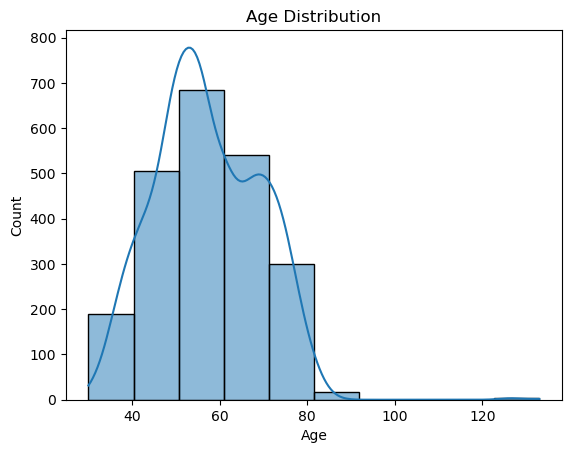

In [31]:
sns.histplot(data["Age"],bins=10,kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Income Distribution')

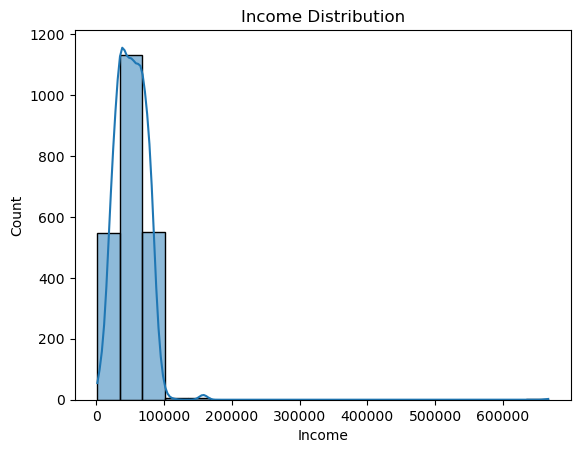

In [122]:
sns.histplot(data["Income"],bins=20,kde=True)
plt.title("Income Distribution")

Text(0.5, 1.0, 'Distribution of total spending')

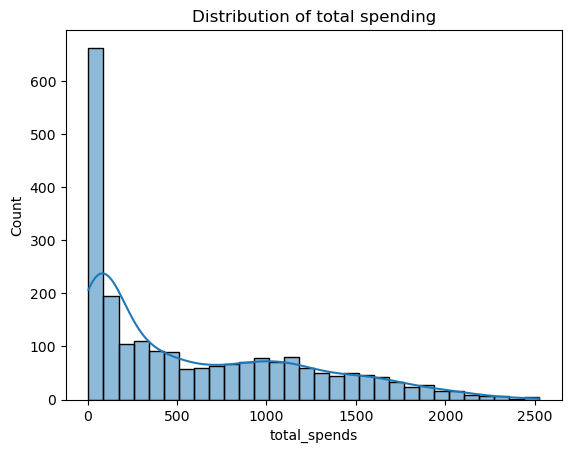

In [33]:
sns.histplot(data["total_spends"],bins=30,kde=True)
plt.title("Distribution of total spending")

Text(0.5, 1.0, 'Income Dstribution in terms of education')

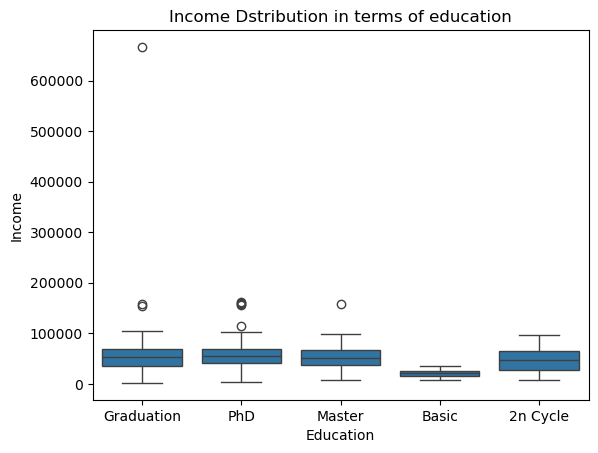

In [34]:
sns.boxplot(y=data["Income"],x=data["Education"])
plt.title("Income Dstribution in terms of education")

Text(0.5, 1.0, 'Distribution of Spending in terms of marital status')

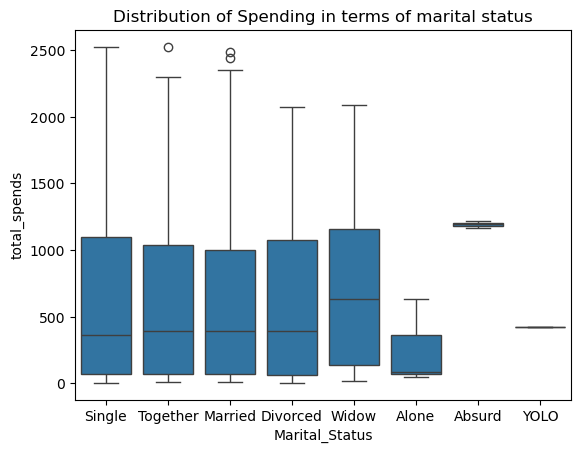

In [35]:
sns.boxplot(x="Marital_Status",y="total_spends",data=data)
plt.title("Distribution of Spending in terms of marital status")

In [36]:
corr=data[["Income","Age","Recency","total_spends","NumWebPurchases","NumStorePurchases"]].corr()

In [37]:
corr

,Income,Age,Recency,total_spends,NumWebPurchases,NumStorePurchases
Income,1.000000,0.160942,-0.003946,0.664706,0.380550,0.526489
Age,0.160942,1.000000,0.019871,0.111306,0.145040,0.128272
Recency,-0.003946,0.019871,1.000000,0.020433,-0.010726,0.000799
total_spends,0.664706,0.111306,0.020433,1.000000,0.519837,0.674669
NumWebPurchases,0.380550,0.145040,-0.010726,0.519837,1.000000,0.502713
NumStorePurchases,0.526489,0.128272,0.000799,0.674669,0.502713,1.000000


<Axes: >

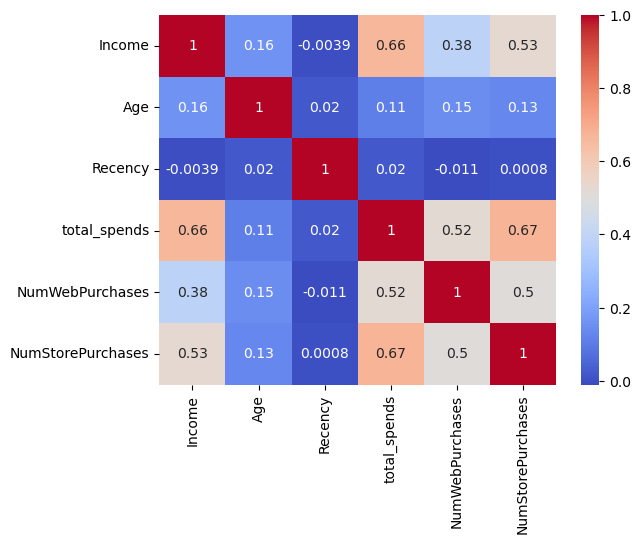

In [38]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [39]:
grp1=data.groupby("Education")["total_spends"].mean().sort_values(ascending=False)

In [40]:
grp1

Education
PhD           672.409465
Graduation    619.898846
Master        611.781081
2n Cycle      496.527094
Basic          81.796296
Name: total_spends, dtype: float64

Text(0, 0.5, 'Average total spend')

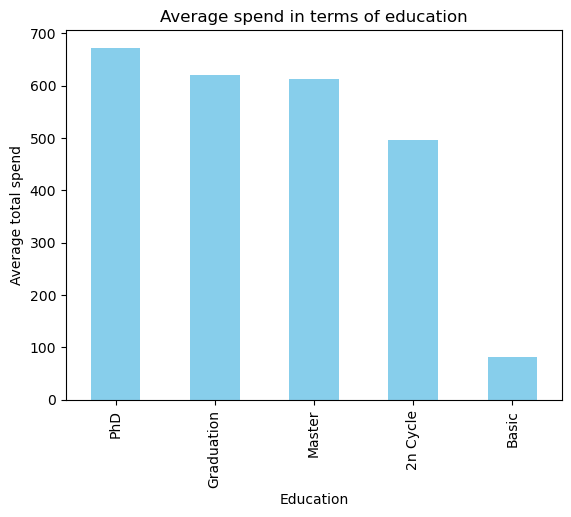

In [41]:
grp1.plot(kind="bar",color="skyblue")
plt.title("Average spend in terms of education")
plt.ylabel("Average total spend")

## 2/2/2026

In [43]:
# This is checks the impact of customer outreach campaigns made by the organizations
data["AcceptedAny"]=data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [44]:
data["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [45]:
data["AcceptedAny"]=data["AcceptedAny"].apply( lambda x:1 if x>0 else 0)

In [46]:
data["AcceptedAny"].unique()

array([1, 0], dtype=int64)

In [47]:
grp2=data.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [48]:
grp2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.350649
Alone       0.333333
Single      0.308333
Divorced    0.297414
Married     0.251157
Together    0.250000
Name: AcceptedAny, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Absurd'),
  Text(1, 0, 'YOLO'),
  Text(2, 0, 'Widow'),
  Text(3, 0, 'Alone'),
  Text(4, 0, 'Single'),
  Text(5, 0, 'Divorced'),
  Text(6, 0, 'Married'),
  Text(7, 0, 'Together')])

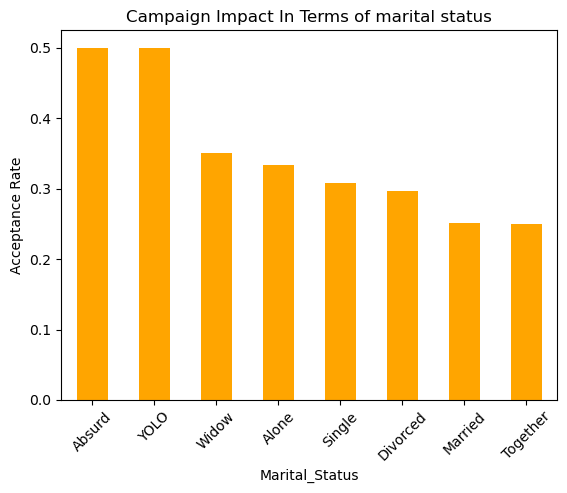

In [49]:
grp2.plot(kind="bar",color="orange")
plt.title("Campaign Impact In Terms of marital status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)

In [50]:
bins=[18,30,40,50,60,70,90]
labels=["18-29","30-39","40-49","50-59","60-69","70+"]
data["AgeGrp"]=pd.cut(data["Age"],bins=bins,labels=labels)
data["AgeGrp"]

0       60-69
1         70+
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGrp, Length: 2240, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [51]:
grp3=data.groupby("AgeGrp")["Income"].mean()

C:\Users\riddh\AppData\Local\Temp\ipykernel_344\1899452135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp3=data.groupby("AgeGrp")["Income"].mean()


In [52]:
grp3

AgeGrp
18-29    10960.500000
30-39    47951.911779
40-49    48090.707521
50-59    50497.387970
60-69    55926.922275
70+      58695.632892
Name: Income, dtype: float64

Text(0.5, 0, 'Mean Income')

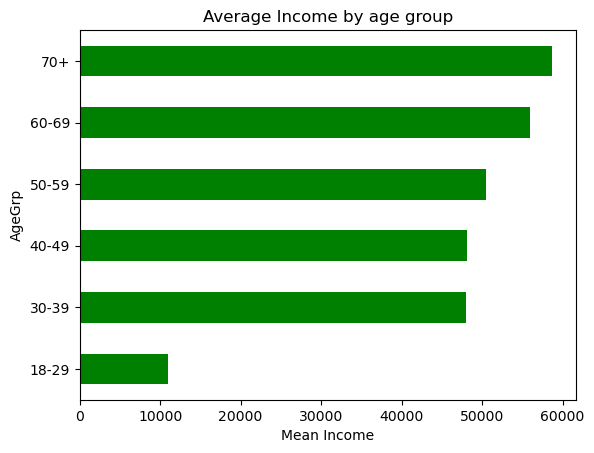

In [53]:
grp3.plot(kind="barh",color="green")
plt.title("Average Income by age group")
plt.xlabel("Mean Income")

In [54]:
## 3/3/2026

In [55]:
features=["Age","Income","total_spends","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [56]:
X=data[features].copy()

In [57]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children', 'total_spends', 'Customer_since',
       'AcceptedAny', 'AgeGrp'],
      dtype='object')

In [58]:
X

,Age,Income,total_spends,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1617,8,4,7,58
1,72,46344.0,27,1,2,5,38
2,61,71613.0,776,8,10,4,26
3,42,26646.0,53,2,4,6,26
4,45,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,59,61223.0,1341,9,4,5,46
2236,80,64014.0,444,8,5,7,56
2237,45,56981.0,1241,2,13,6,91
2238,70,69245.0,843,6,10,3,8


In [59]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [60]:
X_scaled

array([[ 0.98534473,  0.23532677,  1.67941681, ..., -0.55078479,
         0.69390374,  0.30703926],
       [ 1.23573295, -0.23582624, -0.96127545, ..., -1.1661254 ,
        -0.13046347, -0.38366418],
       [ 0.3176428 ,  0.77363327,  0.28267329, ...,  1.29523705,
        -0.54264708, -0.79808624],
       ...,
       [-1.01776106,  0.18910632,  1.05495122, ...,  2.21824797,
         0.28172013,  1.44669994],
       [ 1.06880747,  0.67903514,  0.39394775, ...,  1.29523705,
        -0.95483068, -1.41971934],
       [ 1.23573295,  0.02483795, -0.7204576 , ..., -0.55078479,
         0.69390374, -0.31459383]])

## 4/02/2026

In [131]:
#Finding the best k value for the data to cluster
from sklearn.cluster import KMeans
wcss=[]

In [135]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [137]:
wcss

[10368.76388439468,
 9150.881419773203,
 8290.692909847814,
 7765.267268429424,
 7290.118099023377,
 6831.602065980711,
 6567.336656371512,
 5997.836187064566]

Text(0, 0.5, 'WCSS')

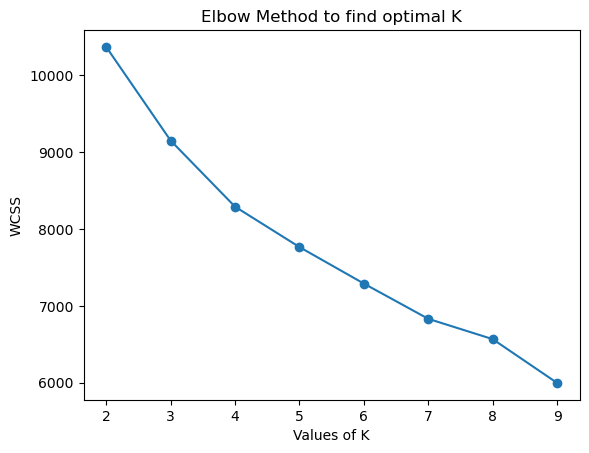

In [139]:
plt.plot(range(2,10),wcss,marker="o")
plt.title("Elbow Method to find optimal K")
plt.xlabel("Values of K")
plt.ylabel("WCSS")

Within-Cluster Sum of Squares (WCSS) is the total sum of squared distances between each data point and its respective cluster centroid in K-Means clustering, acting as a measure of cluster cohesion. It quantifies cluster compactness; lower WCSS values indicate denser, more distinct clusters. The elbow method minimizes WCSS to find the optimal number of clusters, aiming for the "elbow" point in the plot where the rate of decrease shifts from fast to slow. 

In [148]:
kmeans=KMeans(n_clusters=6)
data["Clusters"]=kmeans.fit_predict(X_scaled)

In [150]:
data["Clusters"]

0       3
1       2
2       4
3       2
4       0
       ..
2235    3
2236    3
2237    1
2238    4
2239    0
Name: Clusters, Length: 2240, dtype: int32

In [152]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,total_children,total_spends,Customer_since,AcceptedAny,AgeGrp,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,69,0,1617,4901,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,72,2,27,4351,0,70+,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,61,0,776,4550,0,60-69,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,42,1,53,4377,0,40-49,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,45,1,422,4399,0,40-49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,59,1,1341,4619,0,50-59,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,80,3,444,4257,1,70+,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,45,0,1241,4393,1,40-49,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,70,1,843,4394,0,60-69,4


In [154]:
## Now we do the most important step of the project we will analyse cluster here to understand charatersstics of different clusters

In [156]:
cluster_summary=data.groupby("Clusters")[features].mean()

In [158]:
cluster_summary

,Age,Income,total_spends,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,56.714286,37165.125943,136.443223,2.430403,3.503663,6.324176,75.254579
1,45.683824,80181.369495,1364.731618,4.753676,8.419118,2.621324,49.573529
2,52.497297,33253.239649,103.924324,2.122523,3.162162,6.677477,25.592793
3,60.087432,58700.793723,876.740437,8.210383,7.612022,6.625683,49.715847
4,65.555102,66439.360210,878.563265,4.816327,8.412245,3.653061,17.567347
5,68.492188,73104.179709,1240.117188,4.558594,8.457031,2.800781,73.156250


In [164]:
data["Clusters"].value_counts()

Clusters
2    555
0    546
3    366
1    272
5    256
4    245
Name: count, dtype: int64

In [166]:
#Now doing PCA to analyse the clusters
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_dt=pca.fit_transform(X_scaled)
data["PCA1"],data["PCA2"]=pca_dt[:,0],pca_dt[:,1]

In [170]:
data["PCA1"]

0       1.098153
1      -1.328573
2       1.874851
3      -1.779161
4       0.022104
          ...   
2235    1.238070
2236    0.495186
2237    1.165568
2238    1.886064
2239   -0.840723
Name: PCA1, Length: 2240, dtype: float64

In [172]:
data["PCA2"]

0      -0.157528
1       0.356812
2      -1.000585
3      -0.770076
4       1.152299
          ...   
2235   -0.535860
2236   -0.013798
2237    1.055216
2238   -1.098709
2239   -0.068468
Name: PCA2, Length: 2240, dtype: float64

Text(0.5, 1.0, 'Customer Sgementation (PCA)')

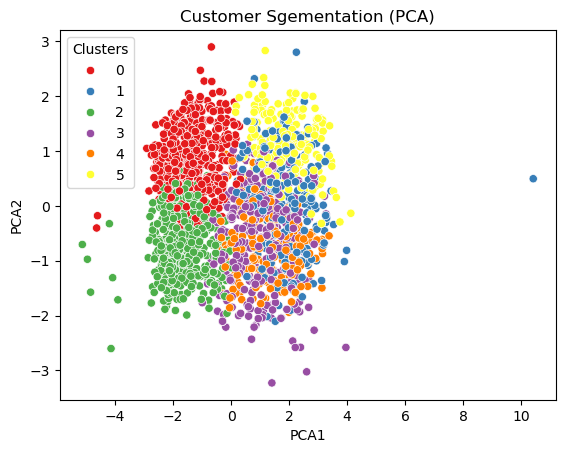

In [176]:
sns.scatterplot(x="PCA1",y="PCA2",hue="Clusters",data=data,palette="Set1")
plt.title("Customer Sgementation (PCA)")

In [178]:
# Model deployment
import joblib

joblib.dump(kmeans,"kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [184]:
cluster_summary

,Age,Income,total_spends,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,56.714286,37165.125943,136.443223,2.430403,3.503663,6.324176,75.254579
1,45.683824,80181.369495,1364.731618,4.753676,8.419118,2.621324,49.573529
2,52.497297,33253.239649,103.924324,2.122523,3.162162,6.677477,25.592793
3,60.087432,58700.793723,876.740437,8.210383,7.612022,6.625683,49.715847
4,65.555102,66439.360210,878.563265,4.816327,8.412245,3.653061,17.567347
5,68.492188,73104.179709,1240.117188,4.558594,8.457031,2.800781,73.156250
